# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns

# Loading Files

In [2]:
df2 = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
df1 = pd.read_csv('tcd ml 2019-20 income prediction test (without labels).csv')
df1.rename(columns={'Income':'Income in EUR'},inplace=True)
data = pd.concat([df2, df1])
#data = data.fillna(method='ffill')
data = data.set_index('Instance')
numeric_features = ['Year of Record', 'Age', 'Size of City','Body Height [cm]']

# Preprocessing Files

In [3]:
data[['Age','Year of Record']] =data[['Age','Year of Record']].fillna(0).astype(np.int64)
data['Year of Record']= data['Year of Record'].fillna(data['Year of Record'].median())
data['Age']= data['Age'].fillna(data['Age'].median())
data['Income in EUR']= data['Income in EUR'].fillna(data['Income in EUR'].median())
data['Profession']= data['Profession'].fillna(data['Profession'].mode()[0])
data['University Degree']= data['University Degree'].fillna(data['University Degree'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data.isnull().sum()

Year of Record           0
Gender                   0
Age                      0
Country                  0
Size of City             0
Profession               0
University Degree        0
Wears Glasses            0
Hair Color           12158
Body Height [cm]         0
Income in EUR            0
dtype: int64

# Using MinMax Scaler for Numerical Data

In [4]:
#Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the featuresz
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'Year of Record', 'Size of City', 'Body Height [cm]']

features_log_minmax_transform = pd.DataFrame(data = data)
features_log_minmax_transform[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
#features_log_minmax_transform = features_log_minmax_transform.drop['Hair Color']
display(features_log_minmax_transform.head(n = 5))

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
Instance,,,,,,,,,,,
1,0.989104,0,0.325397,Belarus,0.024801,steel workers,Bachelor,0,Blond,0.578947,61031.94416
2,0.988608,other,0.325397,Singapore,0.032073,safe event coordinator,Master,0,Black,0.538012,91001.32764
3,0.999505,other,0.222222,Norway,0.025963,receivables/payables analyst,PhD,1,Brown,0.444444,157982.17670
4,0.993561,other,0.261905,Cuba,0.015039,fleet assistant,No,1,Black,0.450292,45993.75793
5,0.995542,female,0.365079,United Arab Emirates,0.001907,lead trainer,0,0,Blond,0.549708,38022.16217


## Dropping features which aren't useful.

In [5]:
features_log_minmax_transform = features_log_minmax_transform.drop(['Hair Color','Wears Glasses'], axis=1)

In [6]:
newdf = features_log_minmax_transform
newdf.head(10)

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm],Income in EUR
Instance,,,,,,,,,
1,0.989104,0,0.325397,Belarus,0.024801,steel workers,Bachelor,0.578947,61031.94416
2,0.988608,other,0.325397,Singapore,0.032073,safe event coordinator,Master,0.538012,91001.32764
3,0.999505,other,0.222222,Norway,0.025963,receivables/payables analyst,PhD,0.444444,157982.17670
4,0.993561,other,0.261905,Cuba,0.015039,fleet assistant,No,0.450292,45993.75793
5,0.995542,female,0.365079,United Arab Emirates,0.001907,lead trainer,0,0.549708,38022.16217
6,0.986132,male,0.476190,Liberia,0.001120,senior security analyst,Bachelor,0.508772,125809.99030
7,0.981674,male,0.563492,State of Palestine,0.024106,program associate,Bachelor,0.467836,150319.42260
8,0.994552,male,0.285714,Israel,0.000627,retail specialist,Bachelor,0.561404,11849.02876
9,0.998019,male,0.341270,South Sudan,0.001705,intergovernmental outreach coordinator,No,0.555556,48058.20607


In [7]:
# Categorical boolean mask
categorical_feature_mask = newdf.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = newdf.columns[categorical_feature_mask].tolist()

In [8]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [9]:
# apply le on categorical feature columns
newdf[categorical_cols] = newdf[categorical_cols].astype('category')
newdf[categorical_cols] = newdf[categorical_cols].apply(lambda col: le.fit_transform(col))
newdf[categorical_cols].head(10)

,Gender,Country,Profession,University Degree
Instance,,,,
1,0,12,1220,1
2,3,128,1059,2
3,3,109,1019,4
4,3,36,566,3
5,1,156,732,0
6,2,82,1154,1
7,2,138,959,1
8,2,69,1049,1
9,2,135,677,3


In [10]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [11]:
newdf.isnull().sum()

Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Body Height [cm]     0
Income in EUR        0
dtype: int64

In [12]:
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(newdf) # It returns an numpy array

## Correlation Graph

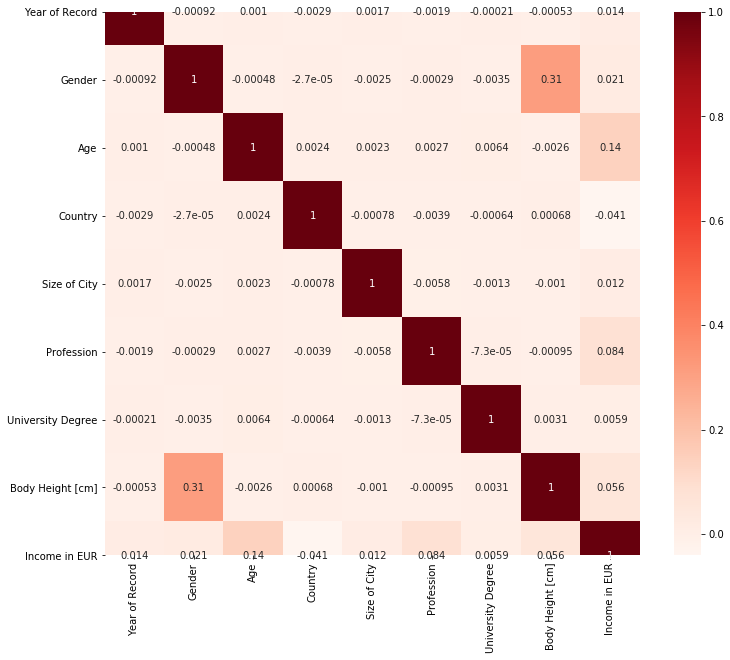

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = newdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["Income in EUR"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Age                 0.140767
Profession          0.083513
Body Height [cm]    0.055880
Income in EUR       1.000000
Name: Income in EUR, dtype: float64

In [15]:
import re
train_df = newdf[:df2.shape[0]]
test_df = newdf[df2.shape[0]:]
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_df.columns.values]
test_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_df.columns.values]
x_test = test_df.drop(['Income in EUR'],axis=1)

In [16]:
train_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height _cm_,Income in EUR
Instance,,,,,,,,,
1,0.989104,0,0.325397,12,0.024801,1220,1,0.578947,61031.94416
2,0.988608,3,0.325397,128,0.032073,1059,2,0.538012,91001.32764
3,0.999505,3,0.222222,109,0.025963,1019,4,0.444444,157982.17670
4,0.993561,3,0.261905,36,0.015039,566,3,0.450292,45993.75793
5,0.995542,1,0.365079,156,0.001907,732,0,0.549708,38022.16217


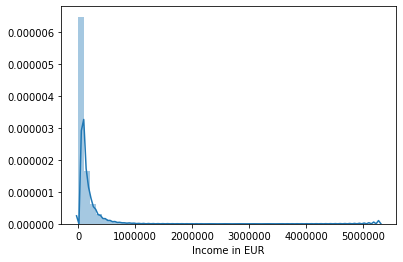

In [17]:
sns.distplot(train_df['Income in EUR'])

## Removing Outliers

(111993, 9)
(111992, 9)


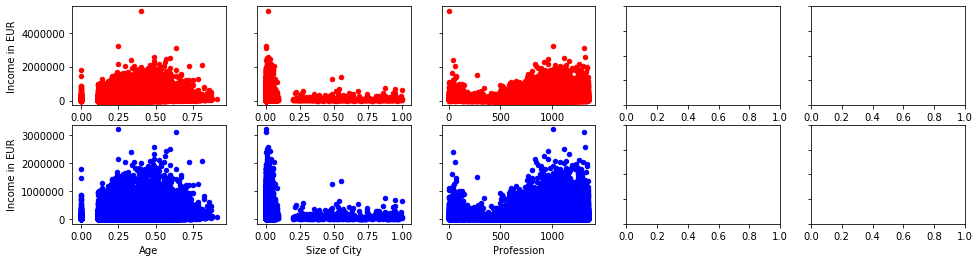

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['Age','Size of City','Profession']
for i, c in zip(range(5), col_name):
    train_df.plot.scatter(ax=axes[i], x=c, y='Income in EUR', sharey=True, colorbar=False, c='r')

# delete outliers
print(train_df.shape)
train_df = train_df[train_df['Income in EUR'] < 3500000]

print(train_df.shape)

for i, c in zip(range(5,10), col_name):
    train_df.plot.scatter(ax=axes[i], x=c, y='Income in EUR', sharey=True, colorbar=False, c='b')

### Defining X and Y for the split part.

In [19]:
X = train_df.drop('Income in EUR',axis=1)
y = train_df['Income in EUR']

In [20]:
x_train, x_val_, y_train, y_val = ms.train_test_split(X,y.values, test_size=0.30, random_state=0)

# Training the Model

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from xgboost import XGBRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from copy import copy



from xgboost import XGBRegressor
my_model = XGBRegressor(objective ='reg:squarederror',
                        n_estimators=3000,
                        learning_rate=0.05,
                        max_depth=6,
                        colsample_bytree =1,
                        min_child_weight=5,
                        subsample=1.0)
my_model.fit(x_train, y_train, early_stopping_rounds=30, 
             eval_set=[(x_val_, y_val)], verbose=20)

[0]	validation_0-rmse:179548
Will train until validation_0-rmse hasn't improved in 30 rounds.
[20]	validation_0-rmse:138728
[40]	validation_0-rmse:125891
[60]	validation_0-rmse:117430
[80]	validation_0-rmse:110904
[100]	validation_0-rmse:104266
[120]	validation_0-rmse:100494
[140]	validation_0-rmse:97266.4
[160]	validation_0-rmse:93825.5
[180]	validation_0-rmse:90996.3
[200]	validation_0-rmse:88233.9
[220]	validation_0-rmse:84406.2
[240]	validation_0-rmse:82063.6
[260]	validation_0-rmse:80193
[280]	validation_0-rmse:78833.5
[300]	validation_0-rmse:77682.8
[320]	validation_0-rmse:76755.2
[340]	validation_0-rmse:75928.7
[360]	validation_0-rmse:75213.3
[380]	validation_0-rmse:74377.5
[400]	validation_0-rmse:73611.9
[420]	validation_0-rmse:73288
[440]	validation_0-rmse:72989.9
[460]	validation_0-rmse:72446.1
[480]	validation_0-rmse:71951.5
[500]	validation_0-rmse:71443.1
[520]	validation_0-rmse:70875.7
[540]	validation_0-rmse:70578.4
[560]	validation_0-rmse:70211.8
[580]	validation_0-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

# Exporting the predicted Values

In [266]:
pred = my_model.predict(x_test)
test_df['Income'] = pred
test_df.to_csv('Submission.csv', columns = ['Income'])
test_df['Income']

0         32601.904297
1         14108.919922
2         37126.425781
3        100286.085938
4         29342.998047
5        113070.562500
6        105736.195312
7         49035.964844
8         54958.136719
9        107200.968750
10         9711.845703
11       227347.796875
12        33580.242188
13       110469.390625
14       280353.531250
15        80925.039062
16        41296.980469
17        25363.539062
18        11691.452148
19        17202.294922
20       108696.898438
21        45399.832031
22        38391.480469
23        28074.687500
24       154989.046875
25        56320.867188
26        30982.804688
27        22500.490234
28       105377.875000
29        70983.218750
             ...      
73200      7509.673340
73201    254443.718750
73202    181676.750000
73203     88665.656250
73204     23906.388672
73205     86393.054688
73206     99170.265625
73207     52242.796875
73208     68887.554688
73209     78007.281250
73210     34870.437500
73211     75531.976562
73212     4

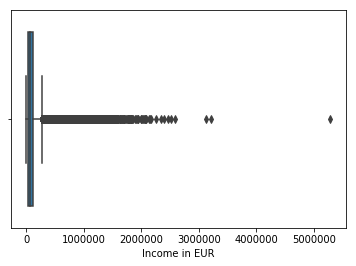

In [145]:
import seaborn as sns
sns.boxplot(x=train_df['Income in EUR'])

In [148]:
count = 0
for i in train_df['Income in EUR'].values:
    if i >= 400000:
        count += 1
print(count)

5045
